In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

from datetime import datetime

INPUT_DATA_DIR = "../data/input"
OUTPUT_DATA_DIR = "../data/output"

current_date = datetime.today().strftime('%Y%m%d')

RESULT_CSV = os.path.join(OUTPUT_DATA_DIR, current_date + "_predicted_rating.csv")
OUTPUT_FIGURE_RATING = os.path.join(OUTPUT_DATA_DIR, current_date + "_rating_confusion.svg")
OUTPUT_FIGURE_CATEGORY = os.path.join(OUTPUT_DATA_DIR, current_date + "_category_confusion.svg")

In [2]:
df = pd.read_csv(RESULT_CSV)

# Create the confusion matrix for the rating and store it in `data/output/[yyyymmdd]_rating_confusion.pdf`

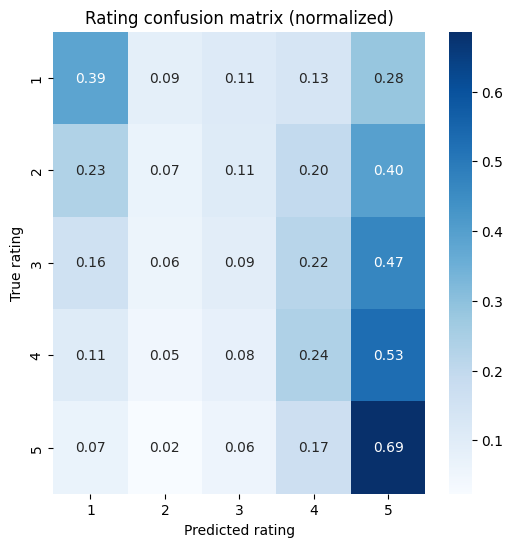

In [3]:
cm = confusion_matrix(df['predicted_rating_discrete'], df['rating'])

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cm_df = pd.DataFrame(cm_norm, index=[1, 2, 3, 4, 5], columns=[1, 2, 3, 4, 5])

plt.figure(figsize=(6, 6))
plt.title('Rating confusion matrix (normalized)')
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='.2f')
plt.xlabel('Predicted rating')
plt.ylabel('True rating')
plt.savefig(OUTPUT_FIGURE_RATING)
plt.show()

# Create the confusion matrix for the category and store it in `data/output/[yyyymmdd]_category_confusion.pdf`

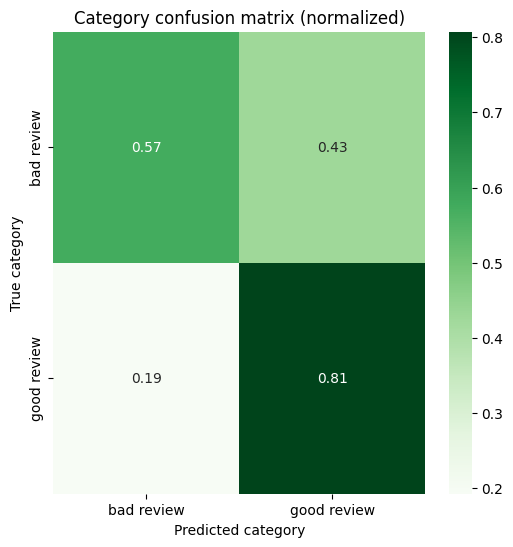

In [4]:
cm = confusion_matrix(df['category'], df['predicted_category'])

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

cm_df = pd.DataFrame(cm_norm, index=['bad review', 'good review'], columns=['bad review', 'good review'])

plt.figure(figsize=(6, 6))
plt.title('Category confusion matrix (normalized)')
sns.heatmap(cm_df, annot=True, cmap='Greens', fmt='.2f')
plt.xlabel('Predicted category')
plt.ylabel('True category')
plt.savefig(OUTPUT_FIGURE_CATEGORY)
plt.show()